Homework 3: Lochan Basyal
    Applied Machine Learning 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import GridSearchCV
import warnings
import numpy as np
import matplotlib.pyplot as plt


Step 1: Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same feature of other samples. Take a random 80% samples for training and the rest 20% for test.

In [2]:
#Standardizing values 
df = pd.read_csv('Titanic.csv')
df = df[['pclass', 'sex', 'age','sibsp','survived']] 
df['pclass'] = df['pclass'].map({'1st':1,'2nd':2,'3rd':3})
df['sex'] = df['sex'].map({'male':0,'female':1})
df['age'].fillna((df['age'].mean()),inplace=True)
df = df.dropna()
df.head()

,pclass,sex,age,sibsp,survived
0,1,1,29.0000,0,1
1,1,0,0.9167,1,1
2,1,1,2.0000,1,0
3,1,0,30.0000,1,0
4,1,1,25.0000,1,0


Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code. You may see a tree similar to this one (the actual structure and size of your tree can be different):


In [3]:
#Data Split
X = df.drop('survived',axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [4]:
#Decision Tree 
dt = DecisionTreeClassifier()

dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Classification Report: \n\n",classification_report(y_test, y_pred))

print("Accuracy: ",accuracy_score(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.79      0.85      0.82       160
           1       0.73      0.64      0.68       102

    accuracy                           0.77       262
   macro avg       0.76      0.74      0.75       262
weighted avg       0.76      0.77      0.76       262

Accuracy:  0.767175572519084


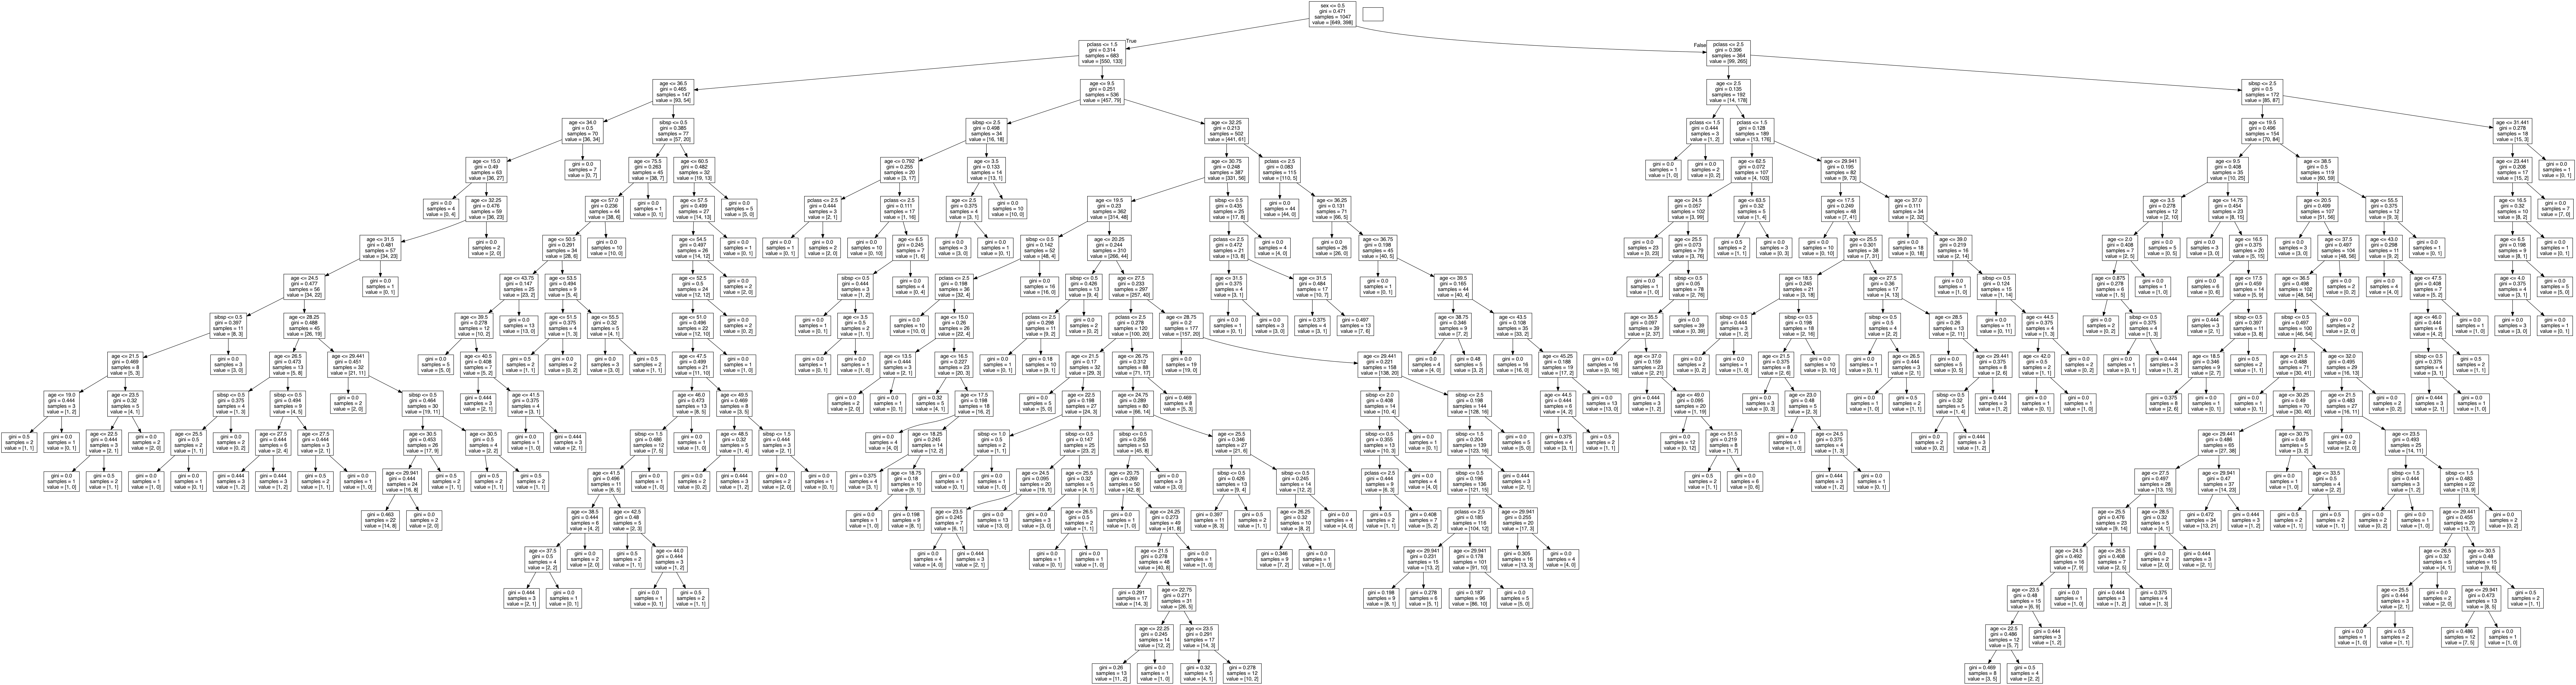

In [5]:
#Plotting Decision Tree
data = export_graphviz(dt, out_file=None,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

Performance measure of full model

In [6]:
#for testing set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)

print("out‐of‐sample percent survivors correctly predicted (on testing set) : {0:.2f}%\n".format(sensitivity_test*100))
print("out-of‐sample percent fatalities correctly predicted (on testing set) : {0:.2f}%\n".format(specificity_test*100))

out‐of‐sample percent survivors correctly predicted (on testing set) : 63.73%

out-of‐sample percent fatalities correctly predicted (on testing set) : 85.00%



Step 3: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2.


In [7]:
#Finding best parameters

warnings.filterwarnings("ignore")
tuned_parameters = {
    'criterion': ['gini','entropy'],
    'max_leaf_nodes': [None,2,3,4,5,6,7,8,9,10,11],
}

clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=tuned_parameters,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()


Best parameters set found on development set:

{'criterion': 'gini', 'max_leaf_nodes': 7}




Step 4: For the pruned tree, report its accuracy on the test set for the following: percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       160
           1       0.76      0.76      0.76       102

    accuracy                           0.81       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262



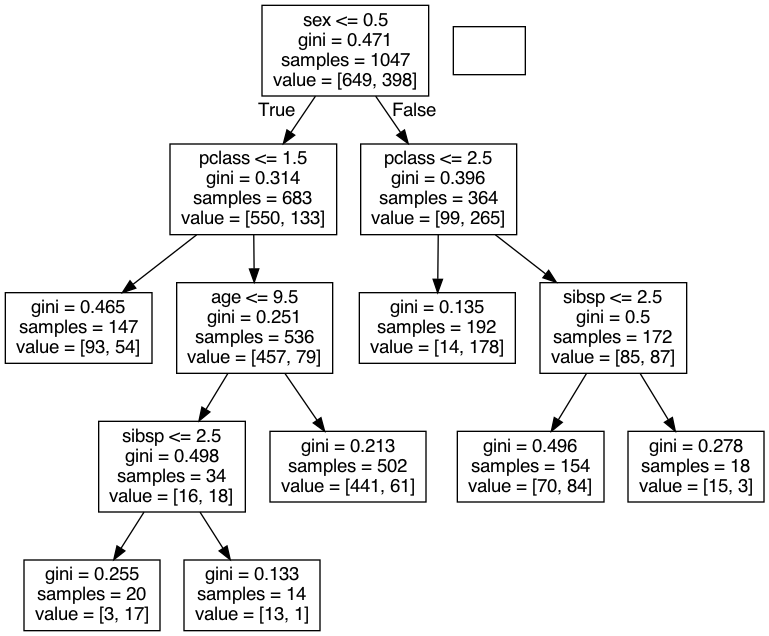

In [8]:
clf = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=7)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

data = export_graphviz(clf, out_file=None,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

In [14]:
#for testing set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)


print("out‐of‐sample percent survivors correctly predicted (on testing set) : {0:.2f}%\n".format(sensitivity_test*100))
print("out-of‐sample percent fatalities correctly predicted (on testing set) : {0:.2f}%\n".format(specificity_test*100))

out‐of‐sample percent survivors correctly predicted (on testing set) : 76.47%

out-of‐sample percent fatalities correctly predicted (on testing set) : 84.38%



In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=7)

clf.fit(X, y)

pred = clf.predict(X_test)
len(pred), len(y_test)

(262, 262)

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=7)

clf = clf.fit(X_train, y_train)
predictions  = clf.predict(X_test)

out_matrix = confusion_matrix(y_test, predictions)
print(out_matrix)


outSampleSurvivors = out_matrix[1][1]/(out_matrix[1][1] + out_matrix[1][0]) 
outSampleFatalities = out_matrix[0][0]/(out_matrix[0][0] + out_matrix[0][1]) 

print("Out-of-sample survivors on testing: ", outSampleSurvivors*100)
print("Out-of-sample fatalities on testing: ", outSampleFatalities*100)

[[135  25]
 [ 27  75]]
Out-of-sample survivors on testing:  73.52941176470588
Out-of-sample fatalities on testing:  84.375


Having visualization between the accuracy of pruned decision tree and RandomForestClassifier, it is showing somewhat similar accuracy. 